# Prequisties

importiing kaggle

In [3]:
import kaggle

Uploading Kaggle Json

In [5]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing and Extracting Dataset

In [12]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d kazanova/sentiment140
# extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/sentiment140.zip'

with ZipFile(dataset, 'r') as z:
    z.extractall()
    print('Dataset is extracted')

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset is extracted


Importing Libraries

In [87]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [14]:
import nltk
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Data Processing

In [43]:
# loading the data from csv file to pandas dataframe
data = pd.read_csv( '/content/training.1600000.processed.noemoticon.csv' , encoding='ISO-8859-1')

In [44]:
print(data.shape)
data.head()

(1599999, 6)


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [55]:
# Rename the columns
data.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [56]:
data.shape

(1600000, 6)

In [57]:
data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [59]:
#Counting missing values
data.isnull().sum()

,0
target,0
id,0
date,0
flag,0
user,0
text,0


In [60]:
#checking the distribution of target values
data['target'].value_counts()

,count
target,
0,800000
4,800000


COnverting "4" to "1"

In [61]:
data.replace({'target': {4: 1}}, inplace=True)

In [62]:
data['target'].value_counts()

,count
target,
0,800000
1,800000


**Stemming**

In [64]:
port_stem = PorterStemmer()

In [69]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [71]:
data['stemmed_content'] = data['text'].apply(stemming)

In [95]:
data.head()

,target,id,date,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [96]:
print(data['stemmed_content'])

0          switchfoot http twitpic com zl awww bummer sho...
1          upset updat facebook text might cri result sch...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4                              nationwideclass behav mad see
                                 ...                        
1599995                           woke school best feel ever
1599996    thewdb com cool hear old walt interview http b...
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: stemmed_content, Length: 1600000, dtype: object


In [97]:
#Seperating the data and the label
X = data['stemmed_content'].values
Y = data['target'].values

In [98]:
print(X)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'readi mojo makeov ask detail'
 'happi th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday thenspcc sparkschar speakinguph h']


In [99]:
print(Y)

[0 0 0 ... 1 1 1]


Splitting The Data

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [101]:
print(X.shape, X_train.shape, X_test.shape)

(1600000,) (1280000,) (320000,)


In [102]:
print(X_train)

['watch saw iv drink lil wine' 'hatermagazin'
 'even though favourit drink think vodka coke wipe mind time think im gonna find new drink'
 ... 'eager monday afternoon'
 'hope everyon mother great day wait hear guy store tomorrow'
 'love wake folger bad voic deeper']


In [103]:
print(X_test)

['mmangen fine much time chat twitter hubbi back summer amp tend domin free time'
 'ah may show w ruth kim amp geoffrey sanhueza'
 'ishatara mayb bay area thang dammit' ...
 'destini nevertheless hooray member wonder safe trip' 'feel well'
 'supersandro thank']


Converting the Textual Data to Numerical Data

In [104]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [106]:
print(X_train)

  (0, 436713)	0.27259876264838384
  (0, 354543)	0.3588091611460021
  (0, 185193)	0.5277679060576009
  (0, 109306)	0.3753708587402299
  (0, 235045)	0.41996827700291095
  (0, 443066)	0.4484755317023172
  (1, 160636)	1.0
  (2, 109306)	0.4591176413728317
  (2, 124484)	0.1892155960801415
  (2, 407301)	0.18709338684973031
  (2, 129411)	0.29074192727957143
  (2, 406399)	0.32105459490875526
  (2, 433560)	0.3296595898028565
  (2, 77929)	0.31284080750346344
  (2, 443430)	0.3348599670252845
  (2, 266729)	0.24123230668976975
  (2, 409143)	0.15169282335109835
  (2, 178061)	0.1619010109445149
  (2, 150715)	0.18803850583207948
  (2, 132311)	0.2028971570399794
  (2, 288470)	0.16786949597862733
  (3, 406399)	0.29029991238662284
  (3, 158711)	0.4456939372299574
  (3, 151770)	0.278559647704793
  (3, 56476)	0.5200465453608686
  :	:
  (1279996, 318303)	0.21254698865277744
  (1279996, 434014)	0.27189450523324465
  (1279996, 390130)	0.2206474219107611
  (1279996, 373144)	0.35212500999832036
  (1279996, 23807

In [107]:
print(X_test)

  (0, 15110)	0.1719352837797837
  (0, 31168)	0.1624772418052177
  (0, 67828)	0.26800375270827315
  (0, 106069)	0.36555450010904555
  (0, 132364)	0.255254889555786
  (0, 138164)	0.23688292264071406
  (0, 171378)	0.2805816206356074
  (0, 271016)	0.45356623916588285
  (0, 279082)	0.17825180109103442
  (0, 388348)	0.2198507607206174
  (0, 398906)	0.34910438732642673
  (0, 409143)	0.3143047059807971
  (0, 420984)	0.17915624523539805
  (1, 6463)	0.30733520460524466
  (1, 15110)	0.211037449588008
  (1, 145393)	0.575262969264869
  (1, 217562)	0.40288153995289894
  (1, 256777)	0.28751585696559306
  (1, 348135)	0.4739279595416274
  (1, 366203)	0.24595562404108307
  (2, 22532)	0.3532582957477176
  (2, 34401)	0.37916255084357414
  (2, 89448)	0.36340369428387626
  (2, 183312)	0.5892069252021465
  (2, 256834)	0.2564939661498776
  :	:
  (319994, 443794)	0.2782185641032538
  (319995, 107868)	0.33399349737546963
  (319995, 109379)	0.3020896484890833
  (319995, 155493)	0.2770682832971669
  (319995, 2133

Training The ML Model

In [108]:
# Initialize Logistic Regression and Naive Bayes models
logistic_model = LogisticRegression(max_iter=1000)
naive_bayes_model = MultinomialNB()

In [109]:
# Train Logistic Regression model
logistic_model.fit(X_train, Y_train)

# Train Naive Bayes model
naive_bayes_model.fit(X_train, Y_train)

MultinomialNB()

# Model Evaluation

Model Evaluation - Logistic Regression

In [110]:
X_train_prediction_logistic = logistic_model.predict(X_train)
training_data_accuracy_logistic = accuracy_score(Y_train, X_train_prediction_logistic)
print('Logistic Regression - Training Accuracy:', training_data_accuracy_logistic)

X_test_prediction_logistic = logistic_model.predict(X_test)
test_data_accuracy_logistic = accuracy_score(Y_test, X_test_prediction_logistic)
print('Logistic Regression - Test Accuracy:', test_data_accuracy_logistic)

Logistic Regression - Training Accuracy: 0.79871953125
Logistic Regression - Test Accuracy: 0.77668125


Model Evaluation - Naive Bayes

In [111]:
X_train_prediction_nb = naive_bayes_model.predict(X_train)
training_data_accuracy_nb = accuracy_score(Y_train, X_train_prediction_nb)
print('Naive Bayes - Training Accuracy:', training_data_accuracy_nb)

X_test_prediction_nb = naive_bayes_model.predict(X_test)
test_data_accuracy_nb = accuracy_score(Y_test, X_test_prediction_nb)
print('Naive Bayes - Test Accuracy:', test_data_accuracy_nb)

Naive Bayes - Training Accuracy: 0.8200265625
Naive Bayes - Test Accuracy: 0.755815625


Saving the model

In [112]:
import pickle

In [113]:
logistic_filename = 'logistic_trained_model.sav'
pickle.dump(logistic_model, open(logistic_filename, 'wb'))

nb_filename = 'naive_bayes_trained_model.sav'
pickle.dump(naive_bayes_model, open(nb_filename, 'wb'))


Using the saved model

In [114]:
# Load both models and make predictions
loaded_logistic_model = pickle.load(open('/content/logistic_trained_model.sav', 'rb'))
loaded_nb_model = pickle.load(open('/content/naive_bayes_trained_model.sav', 'rb'))

In [117]:
# Prediction example using Logistic Regression
X_new = X_test[200]
print("Actual Label:", Y_test[200])
prediction_logistic = loaded_logistic_model.predict(X_new)
print("Logistic Regression Prediction:", prediction_logistic)
print("Sentiment:", 'Negative Tweet' if prediction_logistic[0] == 0 else 'Positive Tweet')

# Prediction example using Naive Bayes
prediction_nb = loaded_nb_model.predict(X_new)
print("Naive Bayes Prediction:", prediction_nb)
print("Sentiment:", 'Negative Tweet' if prediction_nb[0] == 0 else 'Positive Tweet')

Actual Label: 1
Logistic Regression Prediction: [1]
Sentiment: Positive Tweet
Naive Bayes Prediction: [0]
Sentiment: Negative Tweet


# **Viusaling the Data**

Comparing the accuracies

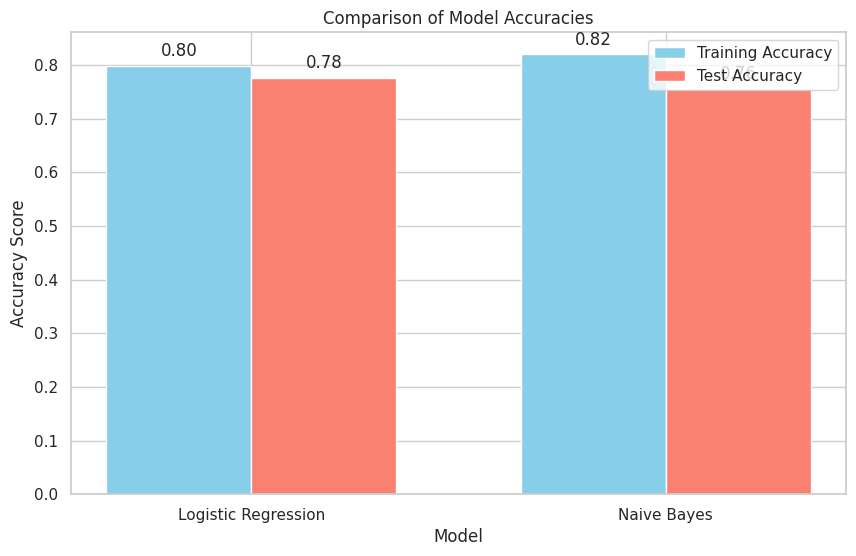

In [118]:
import matplotlib.pyplot as plt
import numpy as np

# Define accuracy scores
model_names = ['Logistic Regression', 'Naive Bayes']
train_accuracies = [training_data_accuracy_logistic, training_data_accuracy_nb]
test_accuracies = [test_data_accuracy_logistic, test_data_accuracy_nb]

# Set up bar positions
bar_width = 0.35
bar_positions = np.arange(len(model_names))

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 6))

# Training accuracy bars
train_bars = ax.bar(bar_positions - bar_width/2, train_accuracies, bar_width, label='Training Accuracy', color='skyblue')

# Test accuracy bars
test_bars = ax.bar(bar_positions + bar_width/2, test_accuracies, bar_width, label='Test Accuracy', color='salmon')

# Adding labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy Score')
ax.set_title('Comparison of Model Accuracies')
ax.set_xticks(bar_positions)
ax.set_xticklabels(model_names)
ax.legend()

# Display the values on top of each bar
for bars in [train_bars, test_bars]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

Precision, Recall & F1 Score

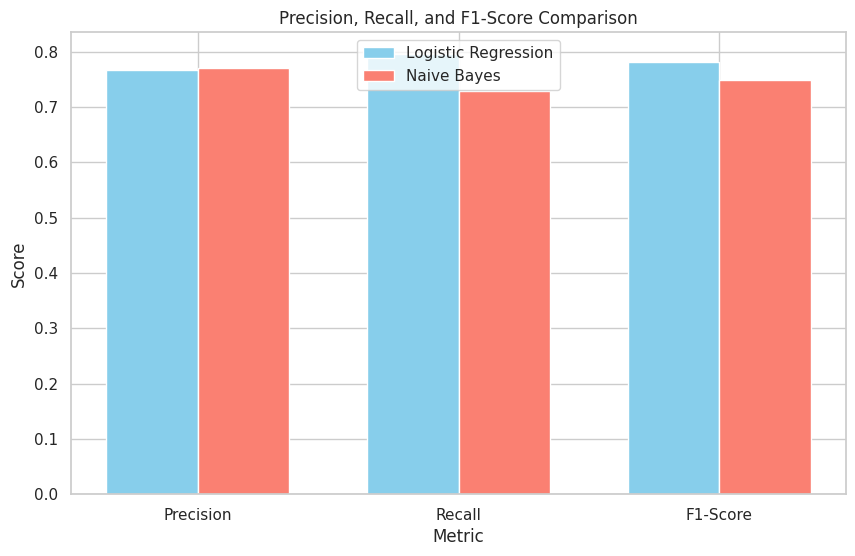

In [123]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Metrics for Logistic Regression
precision_logistic = precision_score(Y_test, logistic_model.predict(X_test))
recall_logistic = recall_score(Y_test, logistic_model.predict(X_test))
f1_logistic = f1_score(Y_test, logistic_model.predict(X_test))

# Metrics for Naive Bayes
precision_nb = precision_score(Y_test, naive_bayes_model.predict(X_test))
recall_nb = recall_score(Y_test, naive_bayes_model.predict(X_test))
f1_nb = f1_score(Y_test, naive_bayes_model.predict(X_test))

# Data for bar chart
metrics = ['Precision', 'Recall', 'F1-Score']
logistic_scores = [precision_logistic, recall_logistic, f1_logistic]
nb_scores = [precision_nb, recall_nb, f1_nb]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, logistic_scores, width, label='Logistic Regression', color='skyblue')
ax.bar(x + width/2, nb_scores, width, label='Naive Bayes', color='salmon')

ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()


Confusion Matrix

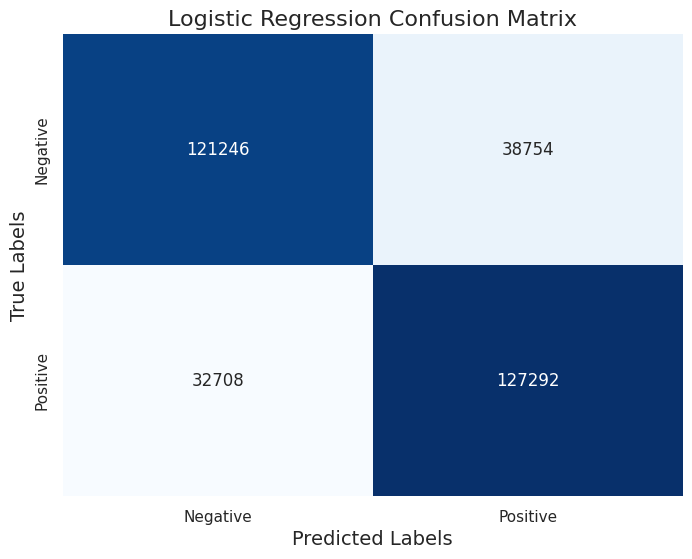

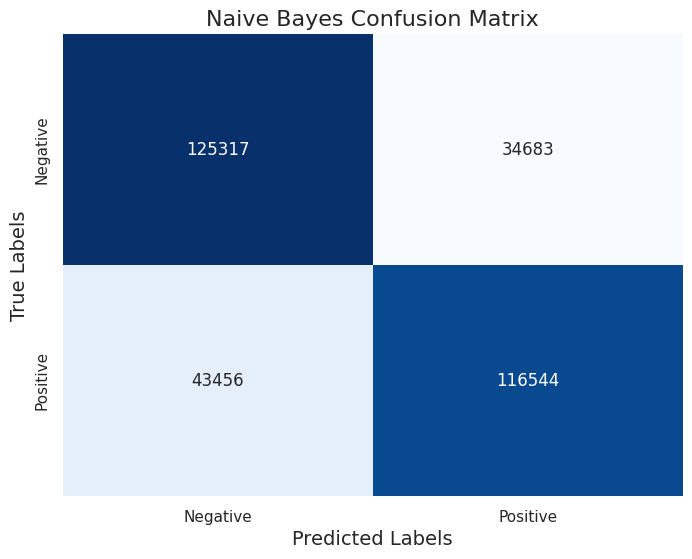

In [126]:
# Generating predictions for Logistic Regression and Naive Bayes models
logistic_pred = logistic_model.predict(X_test)
naive_bayes_pred = naive_bayes_model.predict(X_test)

# Function to plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    """
    This function generates a confusion matrix heatmap with clearer annotations.
    Arguments:
    - y_true: The true labels
    - y_pred: The predicted labels
    - model_name: Name of the model for title in plot
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plotting confusion matrix with seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])

    # Adding titles and labels
    plt.title(f'{model_name} Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.show()

# Plotting confusion matrices for both models
plot_confusion_matrix(Y_test, logistic_pred, model_name="Logistic Regression")
plot_confusion_matrix(Y_test, naive_bayes_pred, model_name="Naive Bayes")
